In [1]:
%matplotlib inline

In [2]:
import pandas as pd
import matplotlib.pylab as plt
import numpy as np

In [3]:
import nltk
nltk.download("vader_lexicon")
import nltk.sentiment.util
import nltk.sentiment.vader

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /Users/cbuntain/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [4]:
vader = nltk.sentiment.vader.SentimentIntensityAnalyzer()

In [6]:
df = pd.read_csv("tweets_GroundTruth+java.txt", delimiter="\t", header=None, index_col=0)
df.columns = ["mean", "text", "javaVader_value"]

In [7]:
df["vader"] = df["text"].apply(lambda x: vader.polarity_scores(x)["compound"])

In [8]:
df["norm_mean"] = df["mean"] / max(abs(df["mean"].min()), df["mean"].max())

/Library/Python/2.7/site-packages/matplotlib/collections.py:571: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == str('face'):


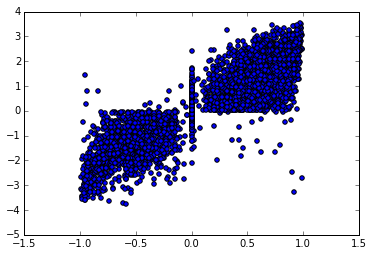

In [9]:
plt.scatter(x=df["vader"], y=df["mean"])

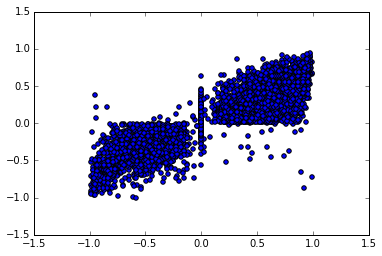

In [10]:
plt.scatter(x=df["vader"], y=df["norm_mean"])

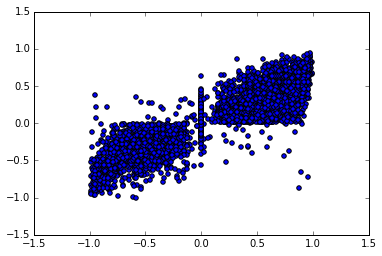

In [11]:
plt.scatter(x=df["javaVader_value"], y=df["norm_mean"])

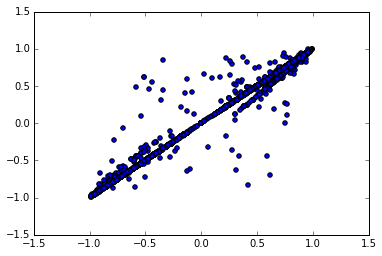

In [14]:
plt.scatter(x=df["javaVader_value"], y=df["vader"])

In [12]:
r = np.corrcoef(x=df["vader"], y=df["mean"])[0,1]

print(r, r**2)

(0.8786492740156957, 0.77202454672830911)


In [13]:
r = np.corrcoef(x=df["javaVader_value"], y=df["mean"])[0,1]

print(r, r**2)

(0.87920166227018393, 0.77299556293865457)


In [17]:
df["diffs"] = df["javaVader_value"] - df["vader"]

In [22]:
df[df.diffs.abs() > 0.1]

,mean,text,javaVader_value,vader,norm_mean,diffs
0,,,,,,
91,0.071429,"This morning was fun, fun, fun, fun... but the...",0.225632,0.8720,0.019048,-0.646368
160,0.778947,"Thank you Brighton. Lovely fun. Now, HOW DID J...",0.741295,0.9374,0.207719,-0.196105
162,1.760417,epic win! good game canada! ... but not good e...,0.732435,0.9006,0.469444,-0.168165
163,-0.354167,"lol @anonymous fun? book, yes, mammo, no. gett...",0.371661,0.8934,-0.094444,-0.521739
167,-0.041237,I feel funny. Funny strange not funny haha.,0.029422,0.6619,-0.010997,-0.632478
240,0.877551,So I just told this guy that I thought his moh...,0.273213,0.7964,0.234014,-0.523187
249,-0.010753,"Really... Who wouldn't want a strong, funny, s...",0.748835,0.2663,-0.002867,0.482535
324,0.020833,Don't you worry about blank. Let me worry abou...,-0.126525,0.5875,0.005556,-0.714025
376,-0.173913,We lost at trivia again! But I had a lot of ri...,-0.236333,-0.3802,-0.046377,0.143867
